## Final Project - Heart Disease Prediction

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv("heart.csv")

In [3]:
print("Data Head")
print(df.head(5))

Data Head
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [4]:
print("Data Information")
df.info()

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


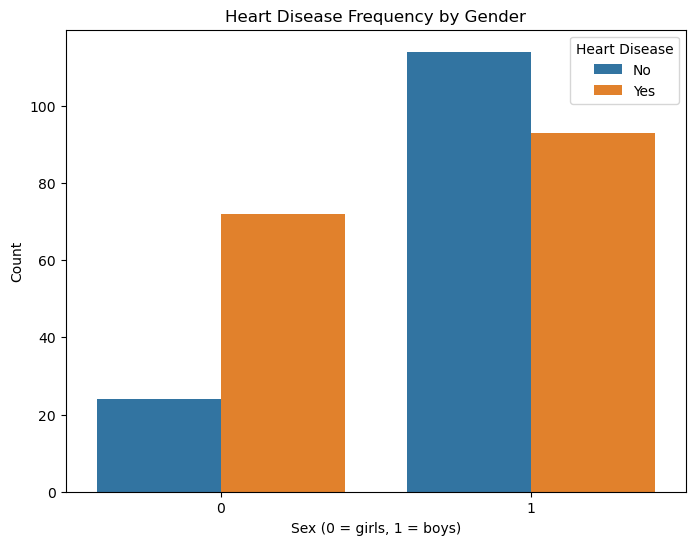

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="sex", hue='target')
plt.title("Heart Disease Frequency by Gender")
plt.xlabel("Sex (0 = girls, 1 = boys)")
plt.ylabel("Count")
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

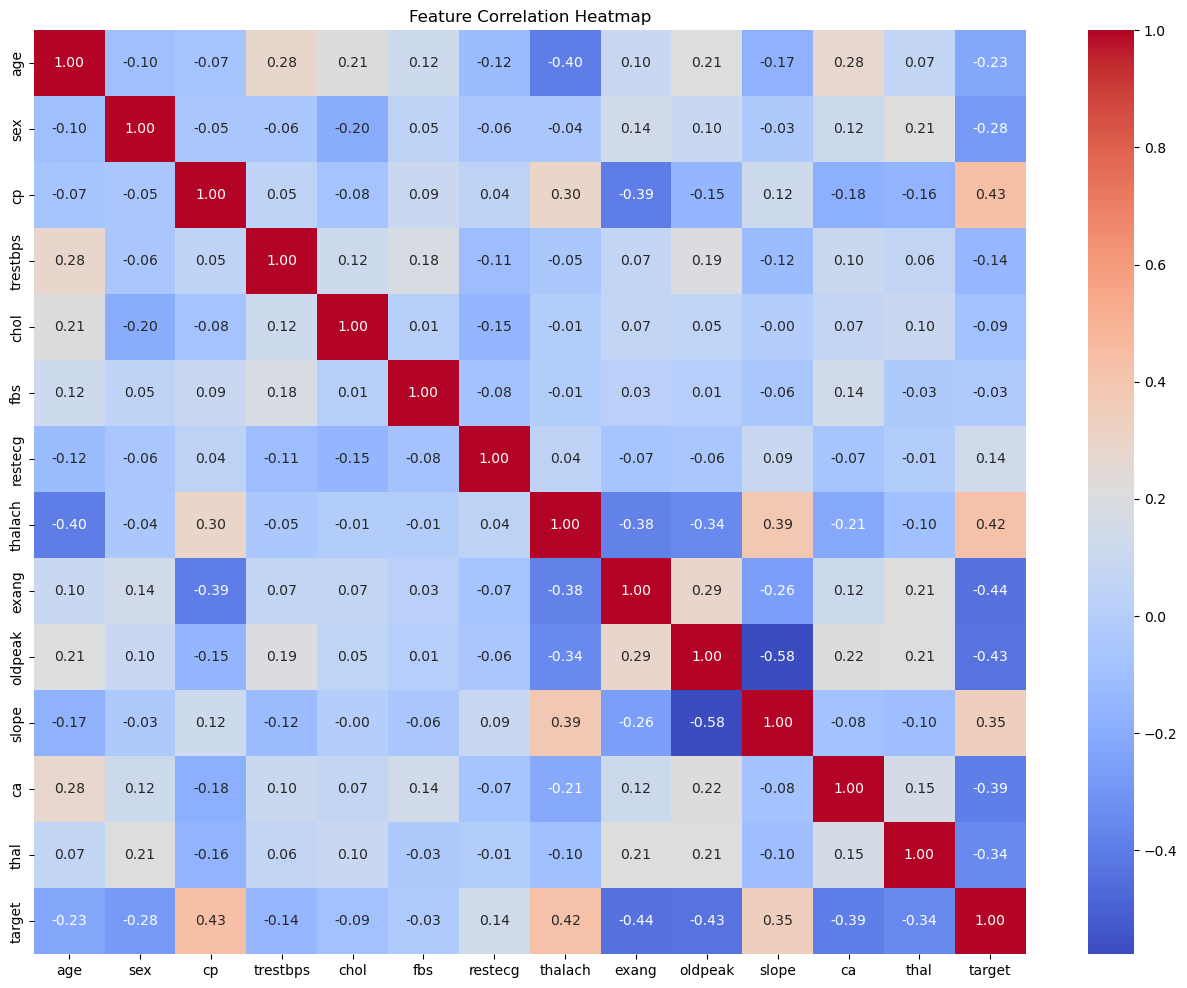

In [8]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),fmt='.2f', annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


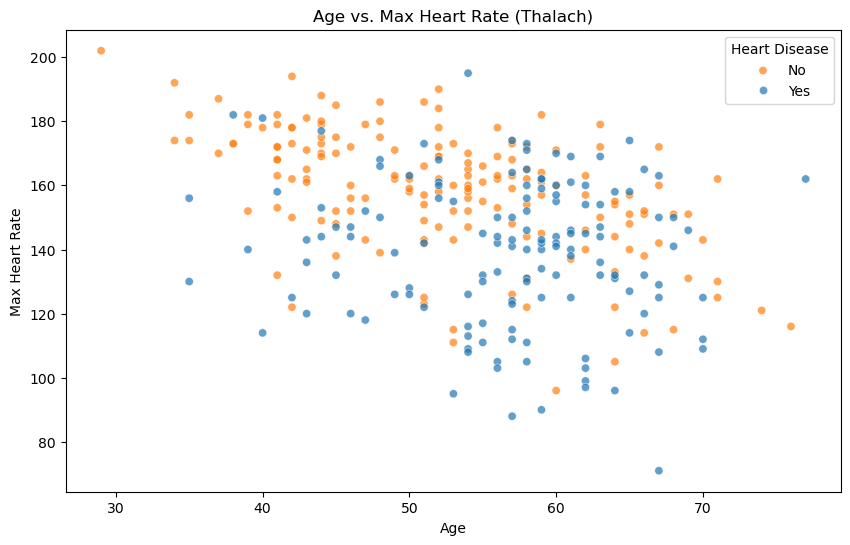

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', hue='target', data=df, alpha=0.7)
plt.title("Age vs. Max Heart Rate (Thalach)")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

In [10]:
X = df.drop('target', axis=1)
Y = df['target']

In [11]:
categorical_features = ['sex', 'cp', 'fbs','restecg', 'exang','slope', 'ca', 'thal']
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

preprocessor = ColumnTransformer( transformers=[ ('num', StandardScaler(), continuous_features), ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) ])

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [14]:
x_train_proc = preprocessor.fit_transform(x_train)
x_test_proc = preprocessor.transform(x_test)

print("Data Preprocessing complete")
print(f"Training data shape after processing: {x_train_proc.shape}")
print(f"Testing data shape after processing: {x_test_proc.shape}")

Data Preprocessing complete
Training data shape after processing: (242, 30)
Testing data shape after processing: (61, 30)


In [15]:
#  Model training and evaluation

print("trainig logistic regression model")
lr=LogisticRegression(max_iter=1000,random_state=42)
lr.fit(x_train_proc,y_train)
y_pred_lr=lr.predict(x_test_proc)

print("LogisticRegression accuracy: {:.3f}%".format(accuracy_score(y_test,y_pred_lr)*100))
print("classification_report \n",classification_report(y_test,y_pred_lr))

trainig logistic regression model
LogisticRegression accuracy: 88.525%
classification_report 
               precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [19]:
print("Tuning and Training Random Forest Model")
# Define a smaller parameter grid for faster tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

Tuning and Training Random Forest Model


In [20]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search.fit(x_train_proc, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

print("\nBest Parameters found by GridSearchCV:", grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits



Best Parameters found by GridSearchCV: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [21]:
y_pred_rf = best_rf_model.predict(x_test_proc)
print("\nTuned Random Forest Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_rf) * 100))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Tuned Random Forest Accuracy: 86.89%
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix:
 [[25  4]
 [ 4 28]]


In [27]:
print("KNN model training...")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_proc,y_train)
y_pred_knn=knn.predict(x_test_proc)

print("Knn Accuracy {:.2f}".format(accuracy_score(y_test,y_pred_knn)*100))
print("classification report:\n",classification_report(y_test,y_pred_knn))

KNN model training...
Knn Accuracy 88.52
classification report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [22]:
importances = best_rf_model.feature_importances_

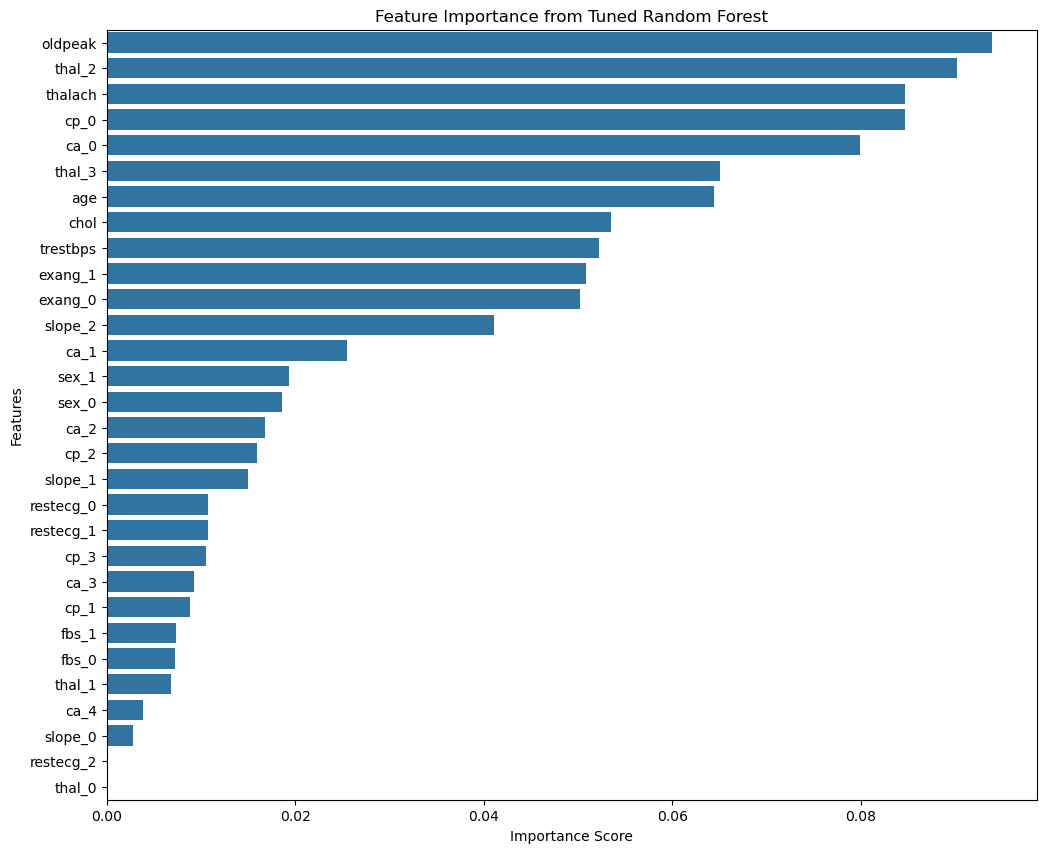

In [28]:
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
# Combine all feature names in the correct order
all_feature_names = continuous_features + list(ohe_feature_names)

# Create a pandas series for easier plotting
feature_importance_df = pd.Series(importances, index=all_feature_names).sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 10))
sns.barplot(x=feature_importance_df, y=feature_importance_df.index)
plt.title('Feature Importance from Tuned Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()